In [1]:
%run to_import.py
%matplotlib inline

In [2]:
segm_set=range(1,13)
data_folder='../../Data'
data_small='../../Data_Small_Tables'

In [3]:
#download data
aa_all=range(13)
for s in segm_set:
    aa_all[s]=pd.read_csv(data_folder+'/S'+str(s)+'_scaled_info.csv',sep='\t')

In [4]:
positions=pd.read_csv(data_small+'/positions.csv',sep='\t',index_col=[0])
for s in range(1,13):
    positions.set_value('positions','S'+str(s),int_array_from_string(positions.loc['positions','S'+str(s)]))

In [5]:
wt_data=pd.read_csv(data_small+'/AA_variants.csv',sep='\t',index_col=[0])

In [6]:
for s in segm_set:
    tmp=map(lambda x: int(x[1:]),wt_data.loc[s]['position'].values)
    positions.set_value('start_Scer','S'+str(s),min(tmp))
    positions.set_value('end_Scer','S'+str(s),max(tmp))

In [7]:
positions.to_csv(data_small+'/positions.csv',sep='\t')

In [8]:
def func_change_positions(mut_list,start_Scer):
    if (str(mut_list)!='nan'):
        new_mutations=[]
        mutations=mut_list.split(':')
        for i in range(len(mutations)):
            aa=mutations[i][-1]
            pos=str(int(mutations[i][:-1])+start_Scer)
            new_mutations.append(pos+aa)
        new_mutations=':'.join(new_mutations)
    else:
        new_mutations=mut_list
    return new_mutations

In [9]:
#mut list
for s in segm_set:
    start_Scer=positions.loc['start_Scer','S'+str(s)]
    aa_all[s].loc[:,'mut_list_Scer']=aa_all[s]['mut_list'].map(lambda x: func_change_positions(x,start_Scer))

In [15]:
aa_all[12][['mut_list_Scer']].head(15)

,mut_list_Scer
0,7A:8I:9N:11V:21L:22C:23I:24E
1,7C:8F:9N:20S:21L:22A
2,7C:8F:9N:11V:21L:22A:24N
3,7C:8F:9S:21L:22C
4,7C:8I:9N:11D:19V:21L:22C:24E
5,7C:8I:9N:19V:20S:21L:24N
6,7C:8I:9N:11N:19V:21L:22A:23I:24E
7,7C:8I:9N:11V:19V:21L:22G:23I
8,7C:8I:9S:11N:21L:22C:24D
9,7C:8I:9S:11N:19V:20S:21L:22G:24N


In [16]:
for s in segm_set:
    aa_all[s].to_csv(data_folder+'/S'+str(s)+'_scaled_info.csv',sep='\t',index=False)

In [74]:
aa_all[segment][aa_all[segment]['nat_lib']==1]['mut_list'].values

array(['1F:2F:5D:16A:17I:18D', '1F:2F:5D:16A:17I', '1F:2F:5D:16A:17I:18N',
       ..., '1S:3S:5V:13V:14S:15L:18E', '1S:3S:5V:13V:14S:15L',
       '1S:3S:5V:13V:14S:15L:18N'], dtype=object)

In [ ]:
for ch in ["[","]","\r\n","'",","]:
    string=string.replace(ch,'')
array = [int(s) for s in string.split()] 



In [12]:
for s in range(1,13):
    aa_all[s]['mut_list'].apply(int_array_from_string)

ValueError: invalid literal for int() with base 10: '0A:2M:4H:5I:6K:9A:25S:29F'

In [10]:
aa_all[6].iloc[0].mut_list

'1'

In [9]:
wt_abs_fitness=0.453710588235

S1 0.127913823486
S2 0.140856460373
S3 0.1296304535
S4 0.12892283873
S5 0.121798498531
S6 0.129281210193
S7 0.205781411503
S8 0.17225958034
S9 0.140023267635
S10 0.129234571937
S11 0.185983058909
S12 0.132830548144


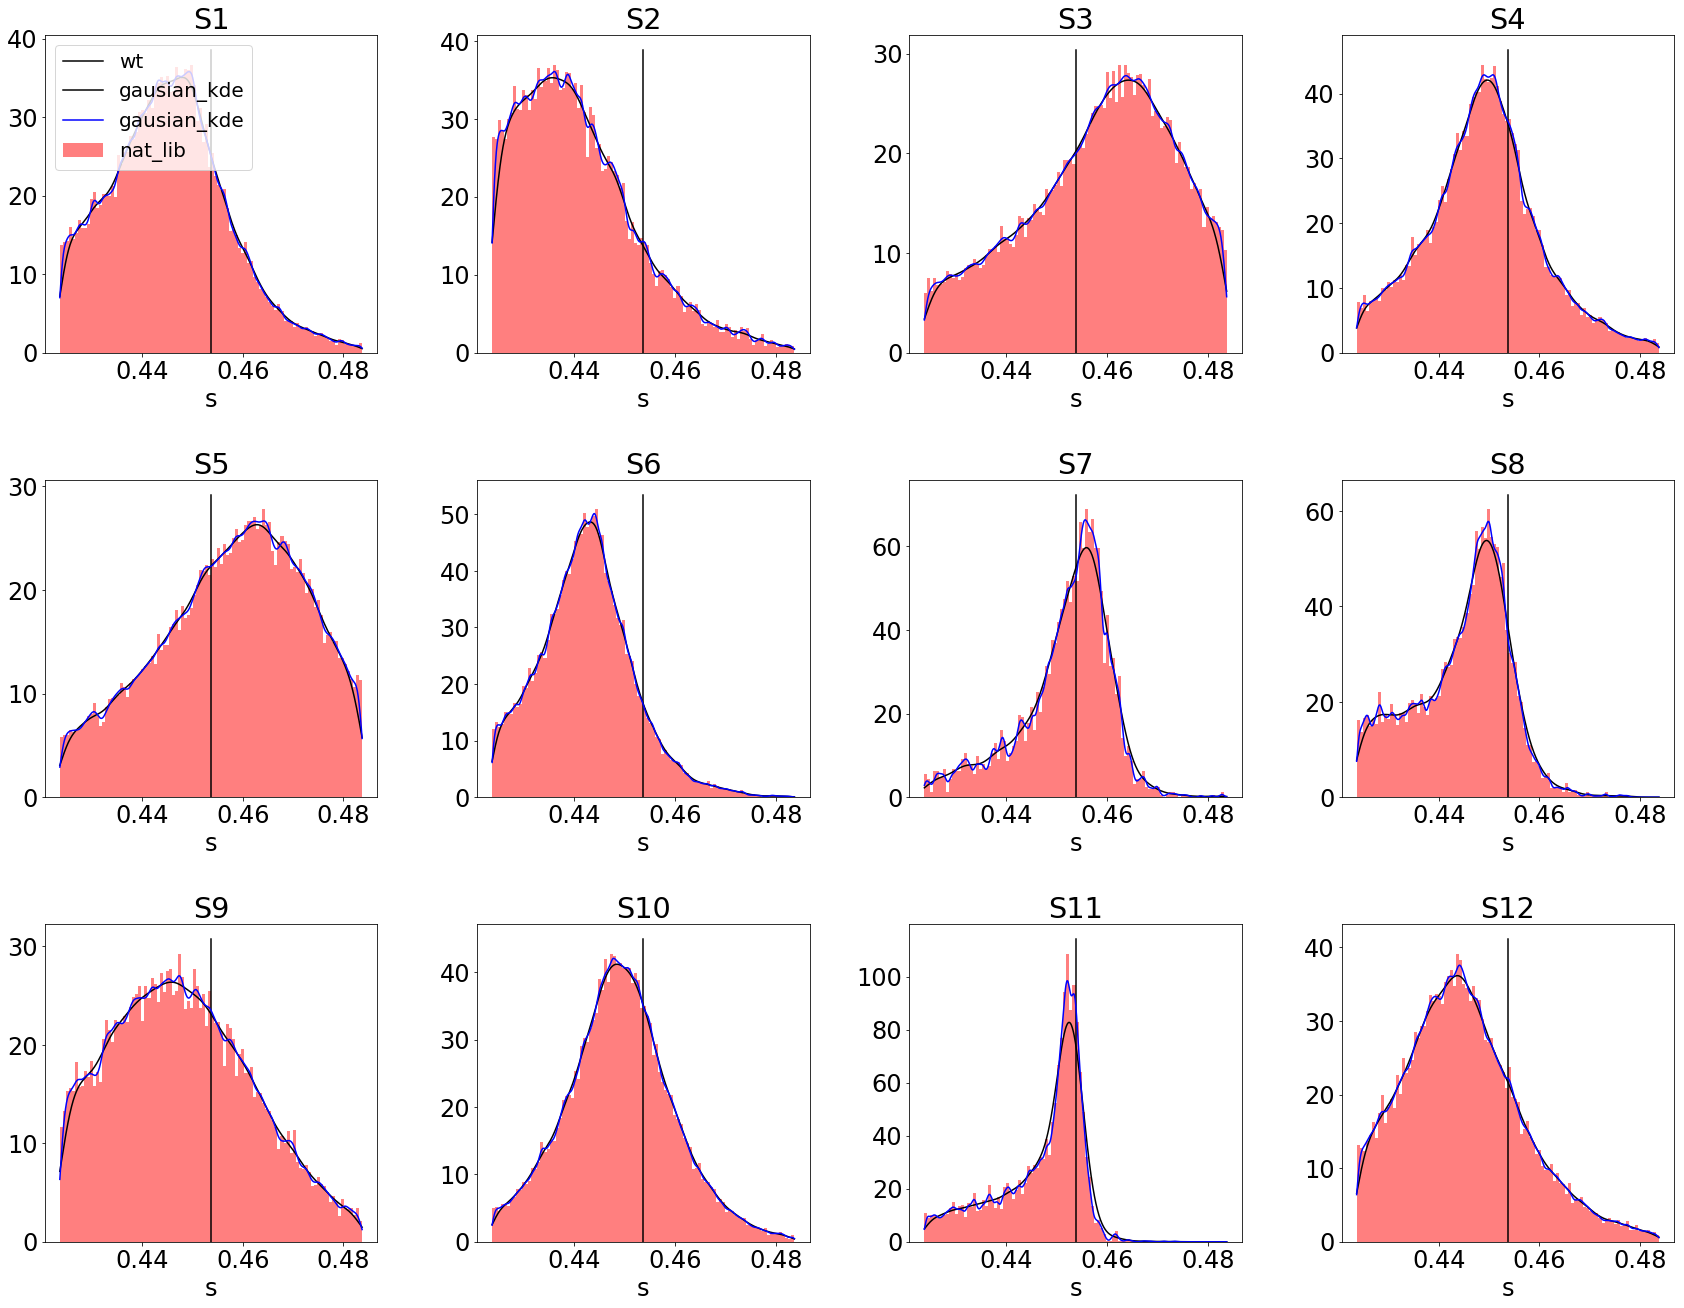

In [24]:
#histogram of t0_fr
fig=plt.figure(figsize=(4*7.3,3*7.4))
plt.rcParams.update({'font.size': 24,'legend.fontsize': 20})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)
count=1
span=0.03
for s in segm_set:
    plt.subplot(3,4,count)
    #mask=aa_all[s][(aa_all[s]['nonsense']==0)]
    #a1,b1,c1=plt.hist(mask['s'],range=(0,0.55),bins=55,alpha=0.5,edgecolor='none',color='b',label='no gap')
    
    mask=aa_all[s][(aa_all[s]['nat_lib']==1)&(aa_all[s]['s']>=wt_abs_fitness-span)&(aa_all[s]['s']<=wt_abs_fitness+span)]
    a2,b2,c2=plt.hist(mask['s'],range=(wt_abs_fitness-span,wt_abs_fitness+span),bins=100,alpha=0.5,normed=True,\
                      edgecolor='none',color='red',label='nat_lib')
    plt.title('S'+str(s))
    plt.xlabel('s')
    plt.plot([wt_abs_fitness,wt_abs_fitness],[0,1.05*max(a2)],c='black',label='wt')
    
    kernel = stats.gaussian_kde(mask['s'])
    plt.plot(np.linspace(wt_abs_fitness-span,wt_abs_fitness+span,1000),\
             kernel(np.linspace(wt_abs_fitness-span,wt_abs_fitness+span,1000)),c='black',label='gausian_kde')
    print 'S'+str(s),kernel.factor
    kernel = stats.gaussian_kde(mask['s'],0.05)
    plt.plot(np.linspace(wt_abs_fitness-span,wt_abs_fitness+span,1000),\
             kernel(np.linspace(wt_abs_fitness-span,wt_abs_fitness+span,1000)),c='b',label='gausian_kde')

    if (s==1):
        plt.legend(loc=2)
    count+=1

In [19]:
kernel.factor

0.05

array([  0.3329023 ,   0.44215145,   0.69746109,   1.14203603,
         2.02538159,   4.9098975 ,  16.90726331,  13.99798847,
         2.03380602,   0.27708126])